In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the dataset

data = pd.read_csv('DataBalanced.csv')

In [6]:
data.shape

(354, 18)

## Feature selection process

We will choose the attributes that will be more influential to the model. We have 17 attributes, which is probably too many. We will winnow down that number to at leats 7, 8 or 10.

We are using the filter method to do this process.

In [4]:
# Importing feature selection libraries

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
# Splitting the dataset

x = data.iloc[:,0:17] # independent features
y = data.iloc[:,-1] # target variable

In [9]:
x.shape

(354, 17)

In [10]:
y.shape

(354,)

In [11]:
# Applying the SelectKBest to extract the top seven features

bestFeatures = SelectKBest(score_func=chi2, k=7)
fit = bestFeatures.fit(x,y)

In [12]:
score = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(x.columns)

# Joining these two lists to get a table of scores of our features

featureScore = pd.concat([columns,score],axis=1)
featureScore.columns = ['Features', 'Score']

In [13]:
featureScore

,Features,Score
0,Age,112.520531
1,Gender,3.346154
2,Height,259.403902
3,Weight,1690.869255
4,Family history,19.408451
5,Main meals per day,13.966443
6,Water consumption,10.833333
7,Fast food consumption,2.044068
8,Fruit and vegetable consumption,9.081081
9,Carbonated drinks consumption,3.829016


In [14]:
print(featureScore.nlargest(8,'Score')) # show the eight best features

              Features        Score
3               Weight  1690.869255
2               Height   259.403902
0                  Age   112.520531
4       Family history    19.408451
11             Alcohol    14.574257
5   Main meals per day    13.966443
16    Intense activity    12.285714
12       Sleep routine    12.259259


Therefore, from the filtering method, we have found the eight most important features (ones with the hghest scores) to be; Weight, Height, Age, Family history, Alcohol, Main meals per day, Intense activity, and Sleep routine

### Feature importance calculations, via tree based classifiers

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [17]:
print(model.feature_importances_)

[0.07189696 0.02644783 0.19521556 0.2706149  0.03594221 0.03644844
 0.02611437 0.04203109 0.03394683 0.03673485 0.02780026 0.0443159
 0.02072619 0.02497458 0.04653243 0.04646473 0.01379289]


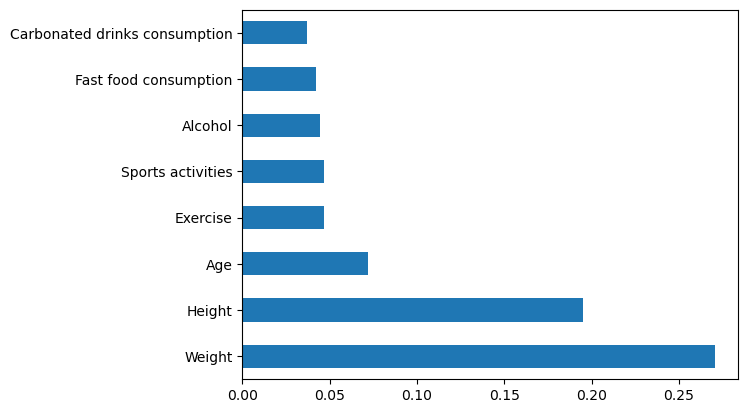

In [18]:
# Plotting a graph for better visualization

feat_imp = pd.Series(model.feature_importances_,index = x.columns)
feat_imp.nlargest(8).plot(kind='barh')
plt.show()

Through the feature importances, we have seen that weight, height, age, and alcohol still are the most important, but exercise, sports activities, fast foods, and carbonated drinks are now being highlighted as the most important. We will employ these as our new data varaiables, and now train our machine learning algorithms.

In [21]:
newData = data.filter(['Age', 'Height', 'Weight', 'Fast food consumption','Carbonated drinks consumption', 'Alcohol', 'Exercise', 'Sports activities','Obesity Status'],axis=1)

In [22]:
newData.head(5)

,Age,Height,Weight,Fast food consumption,Carbonated drinks consumption,Alcohol,Exercise,Sports activities,Obesity Status
0,50,173,79,3,2,2,1,1,4
1,40,189,108,2,2,1,0,1,1
2,53,162,99,3,2,1,2,2,2
3,49,142,112,3,2,2,2,1,3
4,34,145,53,3,2,1,1,2,4


In [23]:
# Saving the new data for modelling

newData.to_csv('obesity_data.csv', index=False)